# CODE EXAMPLE OF IMPLEMENTING LINEAR REGRESSION

Learned from [Assembly AI](https://www.youtube.com/watch?v=ltXSoduiVwY&t=179s)

## Import necessary library

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation
from sklearn.model_selection import train_test_split
from sklearn import datasets

## Load the dataset and separate predictor and target variables

Load data

In [316]:
data = pd.read_csv("Datasets/lr_data.csv")
type(data)

pandas.core.frame.DataFrame

## Exploratory Data Analysis

In [317]:
data.shape

(700, 2)

In [318]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [319]:
data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [320]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


#### Handle missing values

Check for missing values

In [321]:
print(data.isnull().sum())

x    0
y    1
dtype: int64


Remove row with missing values

In [322]:
data = data.dropna()
print(data.isnull().sum())

x    0
y    0
dtype: int64


#### Remove duplicate records

Check if duplicates exist and drop using `.drop_duplicates()`

In [323]:
print(data.duplicated().sum())

0


## Handle Outliers

In [324]:
Q1 = data.x.quantile(0.25)
Q3 = data.x.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
clean_data = data[data.x.between(lower_bound,upper_bound)]

In [325]:
clean_data.shape

(699, 2)

In [326]:
x = data.x
y = data.y

## Splitting data into training and testing sets

#### Manual splicing

In [327]:
# x_train = np.array(clean_data.x[:500]).reshape(500,1)
# y_train = np.array(clean_data.y[:500]).reshape(500,1)


In [328]:
# x_test = np.array(clean_data.x[500:700]).reshape(199,1)
# y_test = np.array(clean_data.y[500:700]).reshape(199,1)

#### Using scikit learn

In [329]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1234)

## Plotting our data

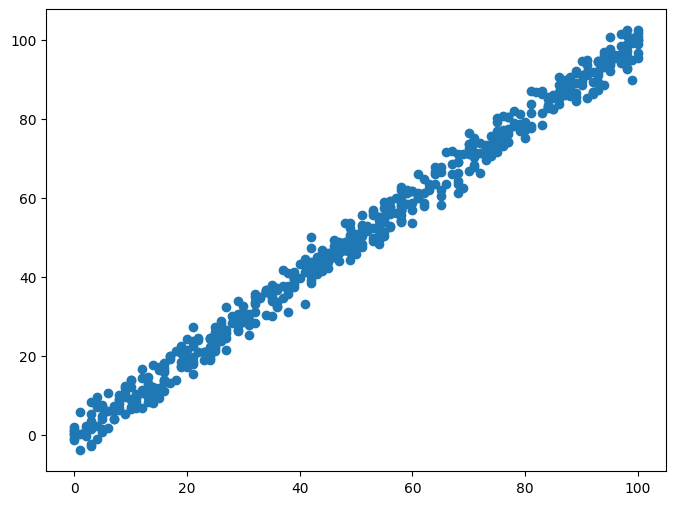

In [330]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train)

## Build the Linear Regression Model

In [331]:
class LinearRegressionEx:

    def __init__(self, lr = 0.001, n_it=1000):
        self.lr = lr
        self.n_it = n_it
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_it):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

## Testing our algorithm

As the basic data cleaning and preparation demo has been show, here is some randomly generated data to show a less compact graph

In [332]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)


Splicing data

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


Plotting the new data

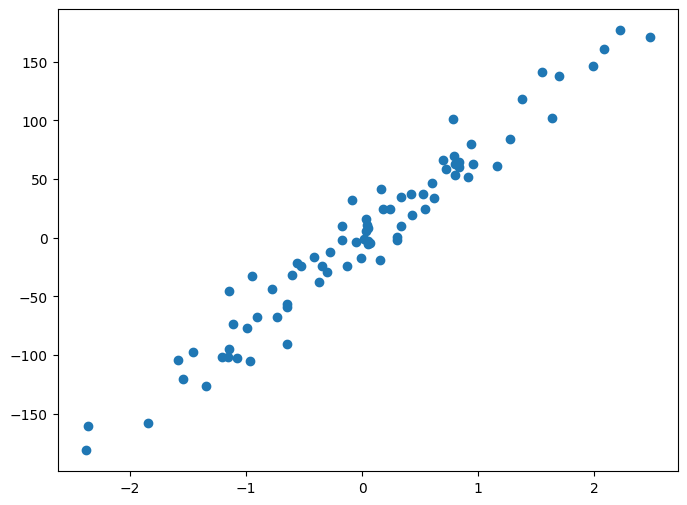

In [334]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train)
plt.show()

Training our model on some data, modify the lr to see how the prediction line changes

305.7719958301902


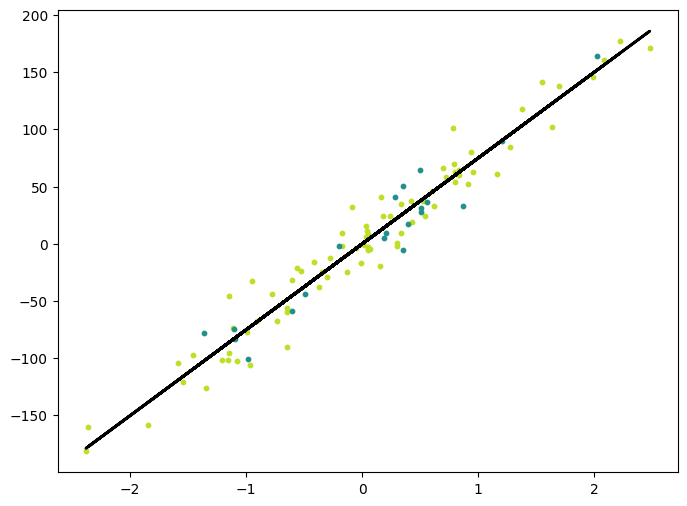

In [335]:
reg = LinearRegressionEx(lr=0.01)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print(mse)

y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()

# Example 2 - Using Scikit Learn Library

Implements Edureka example

100 100


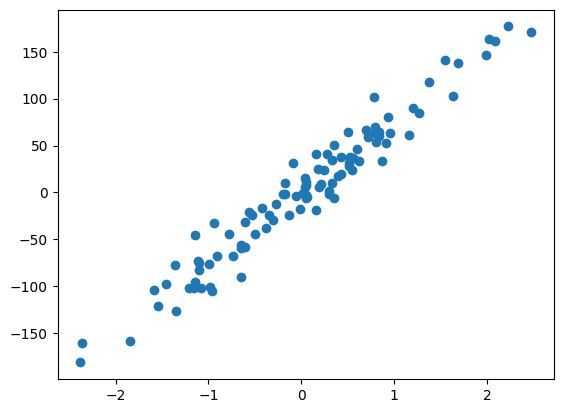

Intercept: 0.011983258032288724
Coefficient: [74.02169683]
        Actual   Predicted
0    24.131549   40.165150
1    64.662646   61.933257
2    63.154633   70.680393
3  -158.284689 -136.252772
4     9.559817   24.605925
5    24.297351   17.974100
6   141.467698  114.522018
7    41.124974   11.847530
8    52.169698   67.730063
9    34.441083   24.605694
10  -56.551401  -47.927764
11  -12.464352  -20.433058
12   19.170107   31.861397
13   31.807668   -6.500958
14   53.813630   59.383795
15    0.980367   22.006880
16 -101.898296  -85.617519
17 -181.348400 -176.143021
18    9.202679   15.505723
19  -95.341059  -84.653928


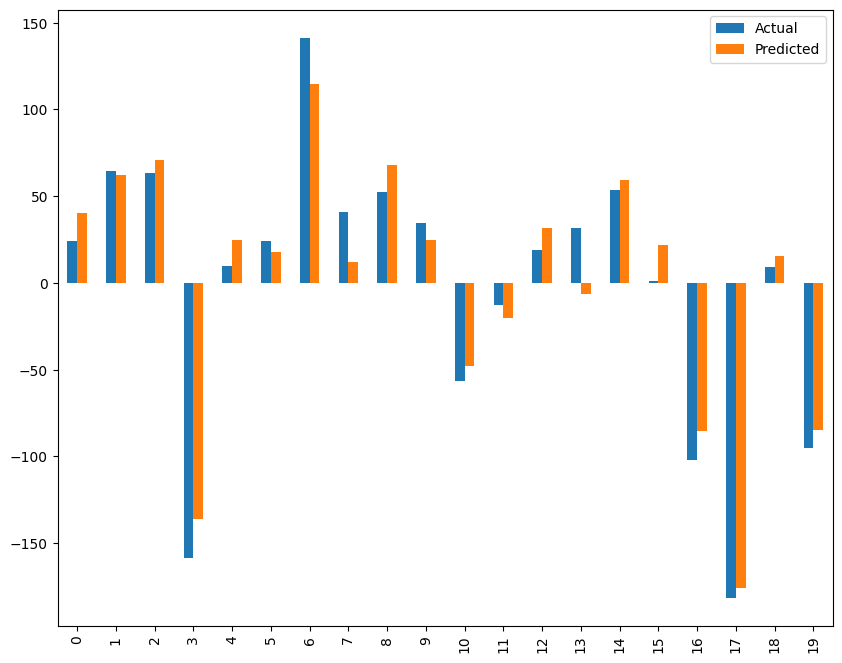

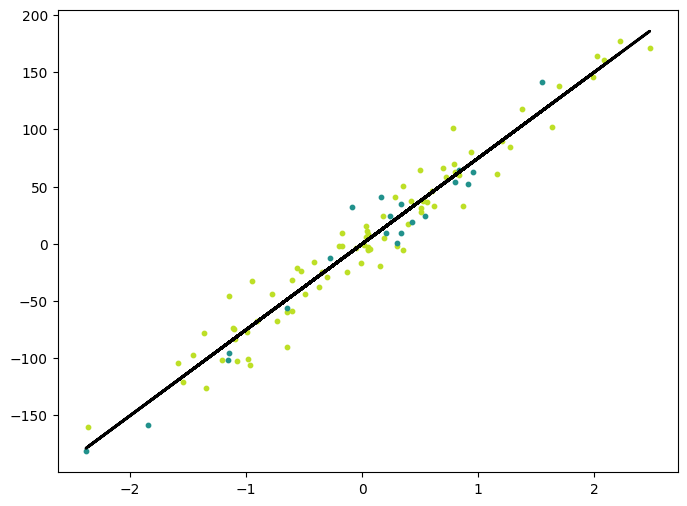

MAE: 14.198708613418352
MSE: 284.03831640999766


In [343]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load/ create dataset
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
print(len(X),len(y))

plt.scatter(X,y)
plt.show()

# plt.hist(X)
# plt.show()

# Data splicing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Instatiate class and train
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Check the intercept and the gradient of the relationship
print('Intercept:', regressor.intercept_)
print('Coefficient:', regressor.coef_)

# Test the model using testing set
y_pred = regressor.predict(X_test)

# Create a dataframe of prediction and test data
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

# Examining the variance in the predictions using visualization
df1 = df.head(30)
df1.plot(kind='bar', figsize=(10,8))
plt.show()

y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

# To improve, we can use parameter tuning, use another better fitted feature, or train with more data